In [104]:
# Hamza Shahid
# Netid: Hshahi2
# Joshua Herman
# Netid: jherma20
# Muhammad Abdullah Umar
# Netid: mumar4
# Final Project - Diabetes Analysis

In [105]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster

In [106]:
# load the dataset using pandas.read_csv
DIABETES_DATA = pd.read_csv('diabetes.csv')

In [107]:
# display the dataset
DIABETES_DATA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
# dealing with missing values 
imputerBloodPressure=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BloodPressure"]=imputerBloodPressure.fit_transform(DIABETES_DATA[["BloodPressure"]]).ravel()

imputerSkinThickness=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["SkinThickness"]=imputerSkinThickness.fit_transform(DIABETES_DATA[["SkinThickness"]]).ravel()

imputerBMI=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BMI"]=imputerBMI.fit_transform(DIABETES_DATA[["BMI"]]).ravel()

DIABETES_DATA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,85,66.000000,29.00000,0,26.600000,0.351,31,0
2,8,183,64.000000,29.15342,0,23.300000,0.672,32,1
3,1,89,66.000000,23.00000,94,28.100000,0.167,21,0
4,0,137,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,116,74.000000,29.15342,0,25.600000,0.201,30,0
6,3,78,50.000000,32.00000,88,31.000000,0.248,26,1
7,10,115,72.405184,29.15342,0,35.300000,0.134,29,0
8,2,197,70.000000,45.00000,543,30.500000,0.158,53,1
9,8,125,96.000000,29.15342,0,32.457464,0.232,54,1


In [109]:
#
# Blood pressure linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           5.43e-09
Time:                        23:08:10   Log-Likelihood:                -2986.7
No. Observations:                 768   AIC:                             5977.
Df Residuals:                     766   BIC:                             5987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.5269      0.648    107.232      

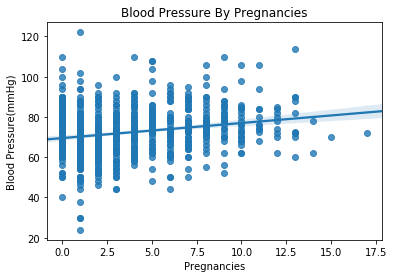

In [110]:
# plot blood pressure vs pregnancies
axis=sns.regplot(DIABETES_DATA['Pregnancies'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Pregnancies', xlabel='Pregnancies', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.12
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.08e-09
Time:                        23:08:12   Log-Likelihood:                -2985.1
No. Observations:                 768   AIC:                             5974.
Df Residuals:                     766   BIC:                             5984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4466      1.668     37.430      0.0

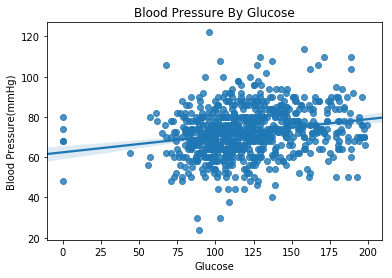

In [111]:
# plot blood pressure vs glucose
axis=sns.regplot(DIABETES_DATA['Glucose'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Glucose', xlabel='Glucose', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     29.58
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           7.23e-08
Time:                        23:08:14   Log-Likelihood:                -2989.2
No. Observations:                 768   AIC:                             5982.
Df Residuals:                     766   BIC:                             5992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        64.6703      1.485     43.538

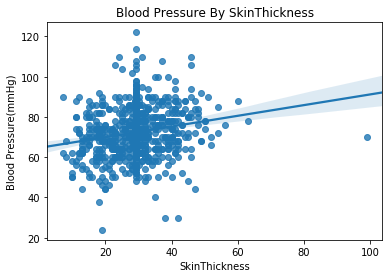

In [112]:
# plot blood pressure vs skin thickness
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By SkinThickness', xlabel='SkinThickness', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.683
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.195
Time:                        23:08:15   Log-Likelihood:                -3003.0
No. Observations:                 768   AIC:                             6010.
Df Residuals:                     766   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.7974      0.531    137.148      0.0

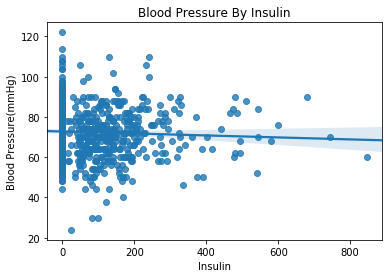

In [113]:
# plot blood pressure vs insulin
axis=sns.regplot(DIABETES_DATA['Insulin'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Insulin', xlabel='Insulin', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     65.81
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.97e-15
Time:                        23:08:16   Log-Likelihood:                -2972.1
No. Observations:                 768   AIC:                             5948.
Df Residuals:                     766   BIC:                             5958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3429      2.024     27.838      0.0

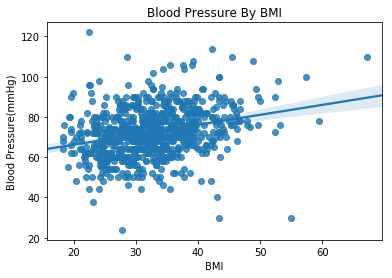

In [114]:
# plot blood pressure vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By BMI', xlabel='BMI', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005849
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.939
Time:                        23:08:17   Log-Likelihood:                -3003.8
No. Observations:                 768   AIC:                             6012.
Df Residuals:                     766   BIC:                             6021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

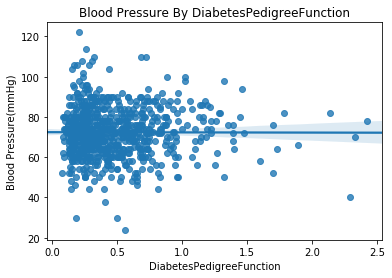

In [115]:
# plot blood pressure vs diabetes pedigree function
axis=sns.regplot(DIABETES_DATA['DiabetesPedigreeFunction'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By DiabetesPedigreeFunction', xlabel='DiabetesPedigreeFunction', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     90.21
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.66e-20
Time:                        23:08:20   Log-Likelihood:                -2961.0
No. Observations:                 768   AIC:                             5926.
Df Residuals:                     766   BIC:                             5935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.3070      1.239     49.467      0.0

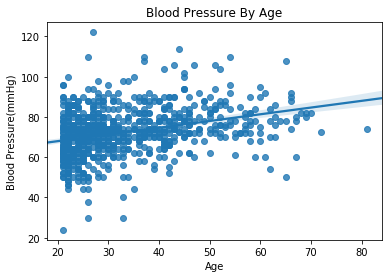

In [116]:
# plot blood pressure vs age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Age', xlabel='Age', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

In [117]:
#
# blood pressure multiple regression relationship
#

In [121]:
# blood pressure vs age + BMI + glucose
model=smf.ols(formula='BloodPressure ~ Age+BMI+Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     58.26
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           6.36e-34
Time:                        23:08:40   Log-Likelihood:                -2924.7
No. Observations:                 768   AIC:                             5857.
Df Residuals:                     764   BIC:                             5876.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8612      2.348     18.681      0.0

In [ ]:
#
# glucose linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     26.38
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           3.56e-07
Time:                        23:13:14   Log-Likelihood:                -3737.3
No. Observations:                 768   AIC:                             7479.
Df Residuals:                     766   BIC:                             7488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       101.5487      3.934     25.813

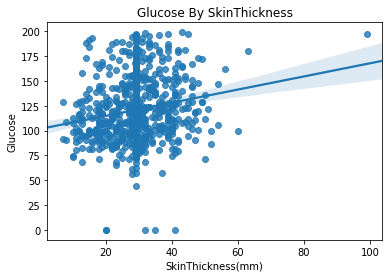

In [122]:
# plot Glucose vs Skin Thickness
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By SkinThickness', xlabel='SkinThickness(mm)', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.34
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           9.70e-10
Time:                        23:13:19   Log-Likelihood:                -3731.5
No. Observations:                 768   AIC:                             7467.
Df Residuals:                     766   BIC:                             7476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9413      5.440     16.165      0.0

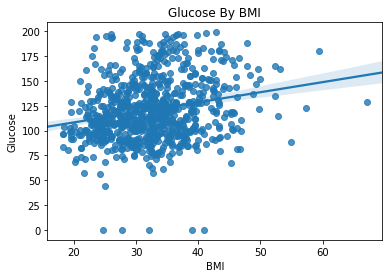

In [123]:
# plot Glucose vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By BMI', xlabel='BMI', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     57.16
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.15e-13
Time:                        23:13:24   Log-Likelihood:                -3722.6
No. Observations:                 768   AIC:                             7449.
Df Residuals:                     766   BIC:                             7459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.0802      3.341     29.058      0.0

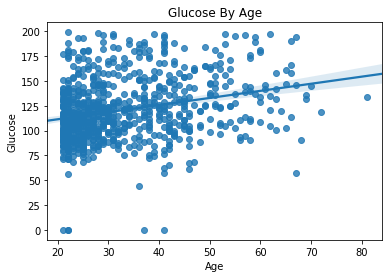

In [124]:
# plot Glucose vs Age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Age', xlabel='Age', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     13.06
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           0.000322
Time:                        23:13:27   Log-Likelihood:                -3743.8
No. Observations:                 768   AIC:                             7492.
Df Residuals:                     766   BIC:                             7501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.1713      1.738     66.860      

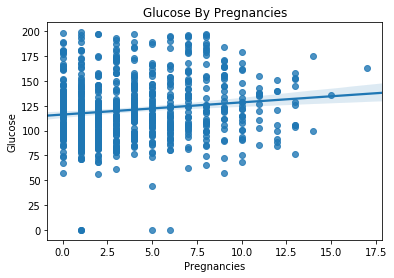

In [125]:
# plot Glucose vs Pregnancies
axis=sns.regplot(DIABETES_DATA['Pregnancies'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Pregnancies', xlabel='Pregnancies', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           3.88e-21
Time:                        23:13:30   Log-Likelihood:                -3705.6
No. Observations:                 768   AIC:                             7415.
Df Residuals:                     766   BIC:                             7425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.5586      1.325     85.694      0.0

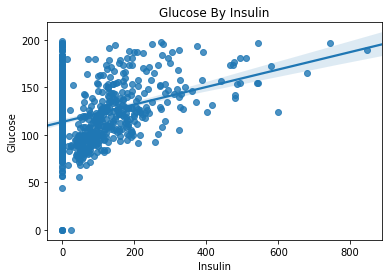

In [126]:
# plot Glucose vs Insulin
axis=sns.regplot(DIABETES_DATA['Insulin'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Insulin', xlabel='Insulin', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     14.73
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           0.000135
Time:                        23:13:33   Log-Likelihood:                -3743.0
No. Observations:                 768   AIC:                             7490.
Df Residuals:                     766   BIC:                             7499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

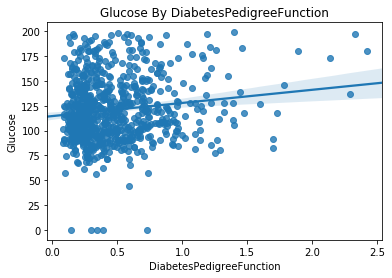

In [127]:
# plot Glucose vs DiabetesPedigreeFunction
axis=sns.regplot(DIABETES_DATA['DiabetesPedigreeFunction'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By DiabetesPedigreeFunction', xlabel='DiabetesPedigreeFunction', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.12
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.08e-09
Time:                        23:13:36   Log-Likelihood:                -3731.6
No. Observations:                 768   AIC:                             7467.
Df Residuals:                     766   BIC:                             7477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        79.2261      6.842     11.579

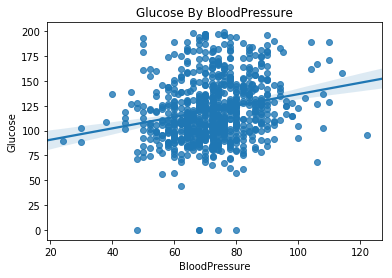

In [128]:
# plot Glucose vs BloodPressure
axis=sns.regplot(DIABETES_DATA['BloodPressure'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By BloodPressure', xlabel='BloodPressure', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ BloodPressure', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

In [132]:
#
# glucose multiple regression relationship
#

In [133]:
# glucose vs BMI + Age + Insulin
model=smf.ols(formula='Glucose ~ BMI + Age + Insulin + BloodPressure', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     54.46
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.11e-40
Time:                        23:19:05   Log-Likelihood:                -3653.8
No. Observations:                 768   AIC:                             7318.
Df Residuals:                     763   BIC:                             7341.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        51.1004      7.097      7.200

In [134]:
#
# BMI linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.34
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           9.70e-10
Time:                        23:19:08   Log-Likelihood:                -2551.1
No. Observations:                 768   AIC:                             5106.
Df Residuals:                     766   BIC:                             5116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7820      0.948     28.248      0.0

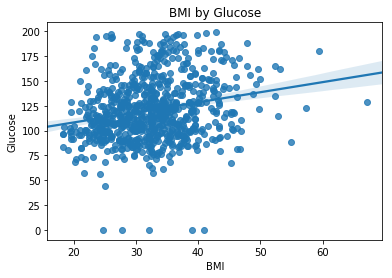

In [135]:
# plot BMI vs Glucose
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Glucose'])
axis.set(title='BMI by Glucose', xlabel='BMI', ylabel='Glucose')


model=smf.ols(formula= 'BMI ~ Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     319.3
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           5.89e-60
Time:                        23:19:11   Log-Likelihood:                -2436.1
No. Observations:                 768   AIC:                             4876.
Df Residuals:                     766   BIC:                             4885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.0908      0.723     27.794

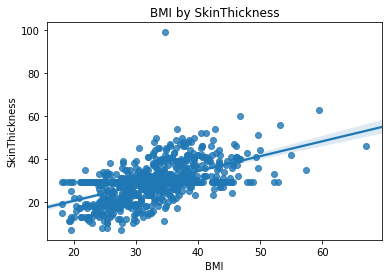

In [136]:
# plot BMI vs SkinThickness
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['SkinThickness'])
axis.set(title='BMI by SkinThickness', xlabel='BMI', ylabel='SkinThickness')


model=smf.ols(formula= 'BMI ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4992
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.480
Time:                        23:19:15   Log-Likelihood:                -2569.6
No. Observations:                 768   AIC:                             5143.
Df Residuals:                     766   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.9616      0.744     42.931      0.0

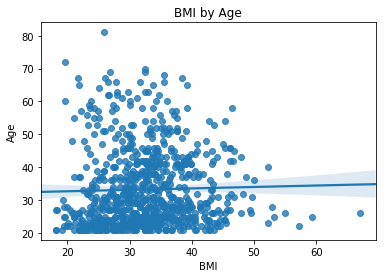

In [137]:
# plot BMI vs Age 
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Age'])
axis.set(title='BMI by Age', xlabel='BMI', ylabel='Age')


model=smf.ols(formula= 'BMI ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3564
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.551
Time:                        23:19:23   Log-Likelihood:                -2569.7
No. Observations:                 768   AIC:                             5143.
Df Residuals:                     766   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.2883      0.377     85.711      

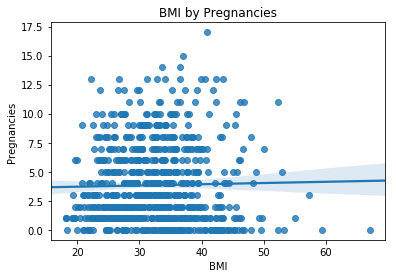

In [138]:
# plot BMI vs Pregnancies
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Pregnancies'])
axis.set(title='BMI by Pregnancies', xlabel='BMI', ylabel='Pregnancies')


model=smf.ols(formula= 'BMI ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     27.07
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.52e-07
Time:                        23:19:29   Log-Likelihood:                -2556.5
No. Observations:                 768   AIC:                             5117.
Df Residuals:                     766   BIC:                             5126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5779      0.297    106.389      0.0

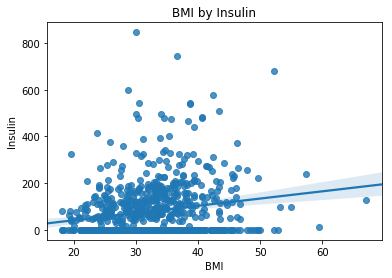

In [139]:
# plot BMI vs Glucose
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Insulin'])
axis.set(title='BMI by Insulin', xlabel='BMI', ylabel='Insulin')


model=smf.ols(formula= 'BMI ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.46
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.96e-05
Time:                        23:19:34   Log-Likelihood:                -2560.7
No. Observations:                 768   AIC:                             5125.
Df Residuals:                     766   BIC:                             5135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

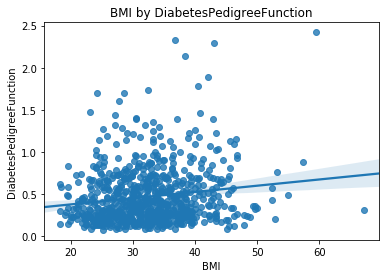

In [140]:
# plot BMI vs DBF
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['DiabetesPedigreeFunction'])
axis.set(title='BMI by DiabetesPedigreeFunction', xlabel='BMI', ylabel='DiabetesPedigreeFunction')


model=smf.ols(formula= 'BMI ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())



In [141]:
#
# BMI multiple regression relationship
#

In [142]:
# BMI vs SkinThickness + BloodPressure + Glucose
model=smf.ols(formula= 'BMI ~ BloodPressure + SkinThickness + Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           3.49e-67
Time:                        23:19:39   Log-Likelihood:                -2413.5
No. Observations:                 768   AIC:                             4835.
Df Residuals:                     764   BIC:                             4854.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.9763      1.387      8.637